In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt 
import warnings  
warnings.filterwarnings("ignore")  
  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  
from sklearn import metrics  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
dv=pd.read_csv(r"data.csv",encoding="unicode_escape")
dv

stn_code       sampling_date                        state   location  \
0           150  February - M021990               Andhra Pradesh  Hyderabad   
1           151  February - M021990               Andhra Pradesh  Hyderabad   
2           152  February - M021990               Andhra Pradesh  Hyderabad   
3           150     March - M031990               Andhra Pradesh  Hyderabad   
4           151     March - M031990               Andhra Pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  West Bengal   ULUBERIA   
435738     SAMP            29-12-15                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  Lakshadweep        NaN   
435741      NaN                 NaN                      Tripura        NaN   

                                           agency  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
435737  West Bengal State Pollution Control Board   
435738  West Bengal State Pollution Control Board   
435739                                        NaN   
435740                                        NaN   
435741                                        NaN   

                                      type   so2   no2   rspm  spm  \
0       Residential, Rural and other Areas   4.8  17.4    NaN  NaN   
1                          Industrial Area   3.1   7.0    NaN  NaN   
2       Residential, Rural and other Areas   6.2  28.5    NaN  NaN   
3       Residential, Rural and other Areas   6.3  14.7    NaN  NaN   
4                          Industrial Area   4.7   7.5    NaN  NaN   
...                                    ...   ...   ...    ...  ...   
435737                               RIRUO  22.0  50.0  143.0  NaN   
435738                               RIRUO  20.0  46.0  171.0  NaN   
435739                                 NaN   NaN   NaN    NaN  NaN   
435740                                 NaN   NaN   NaN    NaN  NaN   
435741                                 NaN   NaN   NaN    NaN  NaN   

              location_monitoring_station  pm2_5        date  
0                                     NaN    NaN  1990-02-01  
1                                     NaN    NaN  1990-02-01  
2                                     NaN    NaN  1990-02-01  
3                                     NaN    NaN  1990-03-01  
4                                     NaN    NaN  1990-03-01  
...                                   ...    ...         ...  
435737  Inside Rampal Industries,ULUBERIA    NaN  2015-12-24  
435738  Inside Rampal Industries,ULUBERIA    NaN  2015-12-29  
435739                                NaN    NaN         NaN  
435740                                NaN    NaN         NaN  
435741                                NaN    NaN         NaN  

[435742 rows x 13 columns]

In [4]:
dv.sample(5)

stn_code sampling_date        state    location  \
411310      NaN      24-08-07  Uttaranchal    Dehradun   
277074      NaN     11/9/2009       Odisha       Angul   
162913      360     12/6/2010       Kerala   Kozhikode   
53657       263     20/8/2011   Chandigarh  Chandigarh   
419503      NaN      3/7/2007  West Bengal      Howrah   

                                        agency  \
411310                                     NaN   
277074                                     NaN   
162913    Kerala State Pollution Control Board   
53657   Chandigarh Pollution Control Committee   
419503                                     NaN   

                                      type  so2   no2        rspm    spm  \
411310              Residential and others  NaN   NaN         NaN    NaN   
277074                    Industrial Areas  5.5  22.0  182.000000  492.0   
162913  Residential, Rural and other Areas  2.0   9.3   26.333333   89.0   
53657   Residential, Rural and other Areas  2.0   7.3   43.000000   88.0   
419503              Residential and others  7.2  86.0  158.000000  305.0   

       location_monitoring_station  pm2_5        date  
411310                 Clock Tower    NaN  2007-08-24  
277074           Industrial Estate    NaN  2009-09-11  
162913   Kozhikode City, Kozhikode    NaN  2010-06-12  
53657      Sector-17 C, Chandigarh    NaN  2011-08-20  
419503                  Naskarpara    NaN  2007-07-03

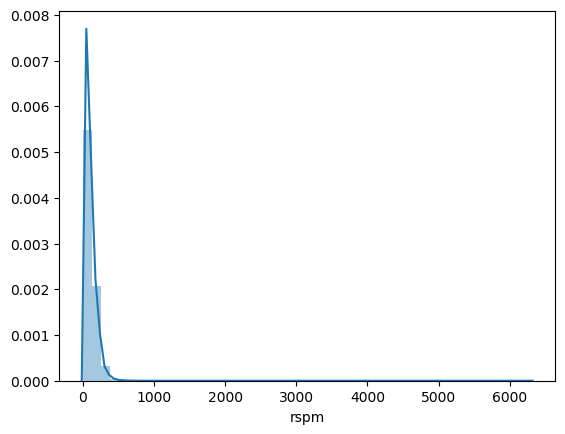

In [6]:
sns.distplot(dv['rspm'])

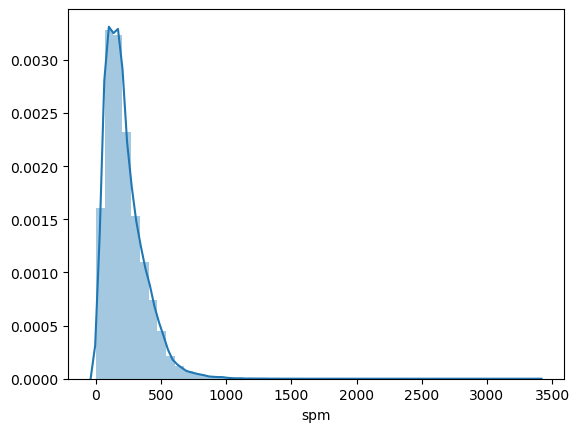

In [7]:
sns.distplot(dv['spm'])

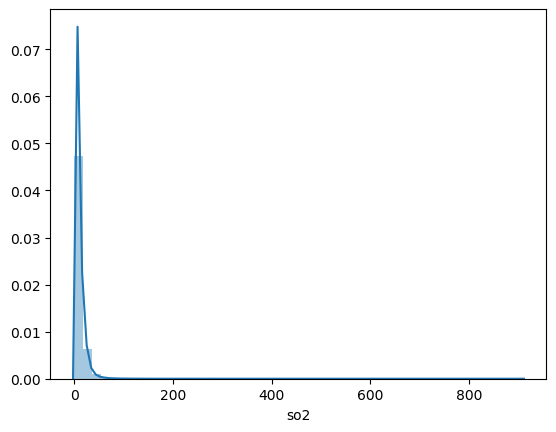

In [8]:
sns.distplot(dv['so2'])

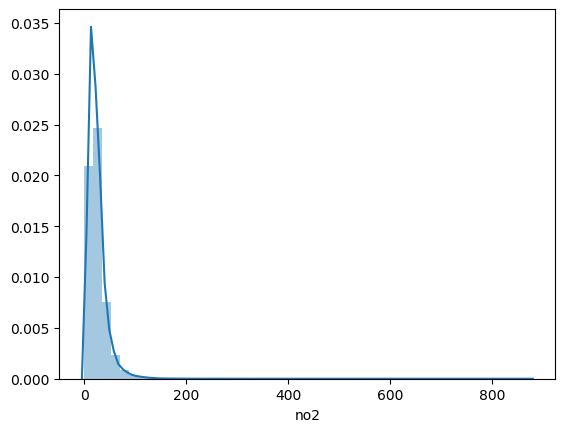

In [9]:
sns.distplot(dv['no2'])

In [3]:
dv.describe()

so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000

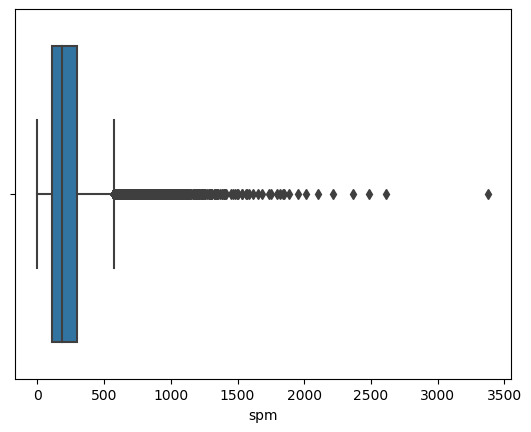

In [4]:
#sns.scatterplot(dv['spm'],dv['spm'])
sns.boxplot(dv['spm'])

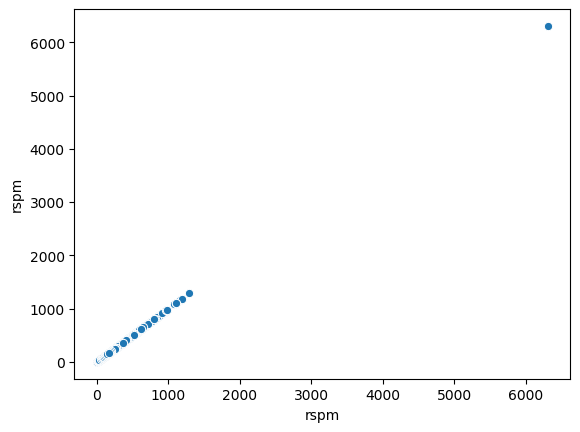

In [5]:
sns.scatterplot(dv['rspm'],dv['rspm'])

In [6]:
dv.drop(['agency'],axis=1,inplace=True)  
dv.drop(['stn_code'],axis=1,inplace=True)  
dv.drop(['date'],axis=1,inplace=True)  
dv.drop(['sampling_date'],axis=1,inplace=True)  
dv.drop(['location_monitoring_station'],axis=1,inplace=True) 

In [7]:
dv.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [8]:
dv

state   location  \
0                    Andhra Pradesh  Hyderabad   
1                    Andhra Pradesh  Hyderabad   
2                    Andhra Pradesh  Hyderabad   
3                    Andhra Pradesh  Hyderabad   
4                    Andhra Pradesh  Hyderabad   
...                             ...        ...   
435737                  West Bengal   ULUBERIA   
435738                  West Bengal   ULUBERIA   
435739  andaman-and-nicobar-islands        NaN   
435740                  Lakshadweep        NaN   
435741                      Tripura        NaN   

                                      type   so2   no2   rspm  spm  pm2_5  
0       Residential, Rural and other Areas   4.8  17.4    NaN  NaN    NaN  
1                          Industrial Area   3.1   7.0    NaN  NaN    NaN  
2       Residential, Rural and other Areas   6.2  28.5    NaN  NaN    NaN  
3       Residential, Rural and other Areas   6.3  14.7    NaN  NaN    NaN  
4                          Industrial Area   4.7   7.5    NaN  NaN    NaN  
...                                    ...   ...   ...    ...  ...    ...  
435737                               RIRUO  22.0  50.0  143.0  NaN    NaN  
435738                               RIRUO  20.0  46.0  171.0  NaN    NaN  
435739                                 NaN   NaN   NaN    NaN  NaN    NaN  
435740                                 NaN   NaN   NaN    NaN  NaN    NaN  
435741                                 NaN   NaN   NaN    NaN  NaN    NaN  

[435742 rows x 8 columns]

In [9]:
dv['location']=dv['location'].fillna(dv['location'].mode()[0])
dv['type']=dv['type'].fillna(dv['type'].mode()[0])

In [10]:
print(dv['rspm'].std())

74.8724299516311


In [11]:
dv['so2']=dv['so2'].fillna(dv['so2'].mean())
dv['no2']=dv['no2'].fillna(dv['no2'].mean())
dv['rspm']=dv['rspm'].fillna(dv['rspm'].std())
dv['spm']=dv['spm'].fillna(dv['spm'].std())

In [12]:
dv.isnull().sum()

state            0
location         0
type             0
so2              0
no2              0
rspm             0
spm              0
pm2_5       426428
dtype: int64

In [13]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    elif (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)
    elif (so2>1600): 
        si= 400+(so2-1600)*(100/800)
    return si
dv['SOi']=dv['so2'].apply(cal_SOi)
data= dv[['so2','SOi']]
data.head()

so2    SOi
0  4.8  6.000
1  3.1  3.875
2  6.2  7.750
3  6.3  7.875
4  4.7  5.875

In [14]:
def cal_Noi(no2):
    ni=0  
    if(no2<=40):
        ni= no2*50/40  
    elif(no2>40 and no2<=80):  
        ni= 50+(no2-40)*(50/40)  
    elif(no2>80 and no2<=180):  
        ni= 100+(no2-80)*(100/100)  
    elif(no2>180 and no2<=280):  
        ni= 200+(no2-180)*(100/100)  
    elif(no2>280 and no2<=400):  
        ni= 300+(no2-280)*(100/120)  
    else:  
        ni= 400+(no2-400)*(100/120)  
    return ni  
dv['Noi']=dv['no2'].apply(cal_Noi)  
data= dv[['no2','Noi']]  
data.head()  

no2     Noi
0  17.4  21.750
1   7.0   8.750
2  28.5  35.625
3  14.7  18.375
4   7.5   9.375

In [15]:
def cal_RSPMI(rspm): 
    rpi=0  
    if(rspm<=30):
        rpi=rspm*50/30  
    elif(rspm>30 and rspm<=60):  
        rpi=50+(rspm-30)*50/30  
    elif(rspm>60 and rspm<=90):  
        rpi=100+(rspm-60)*100/30  
    elif(rspm>90 and rspm<=120):  
        rpi=200+(rspm-90)*100/30  
    elif(rspm>120 and rspm<=250):  
        rpi=300+(rspm-120)*(100/130)  
    else:  
        rpi=400+(rspm-250)*(100/130)  
    return rpi  
dv['Rpi']=dv['rspm'].apply(cal_RSPMI)  
data= dv[['rspm','Rpi']]  
data.head()

rspm         Rpi
0  74.87243  149.574767
1  74.87243  149.574767
2  74.87243  149.574767
3  74.87243  149.574767
4  74.87243  149.574767

In [16]:
def cal_SPMi(spm): 
    spi=0  
    if(spm<=50):  
        spi=spm*50/50  
    elif(spm>50 and spm<=100):  
        spi=50+(spm-50)*(50/50)  
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)  
    elif(spm>250 and spm<=350):  
        spi=200+(spm-250)*(100/100)  
    elif(spm>350 and spm<=430):  
        spi=300+(spm-350)*(100/80)  
    else:  
        spi=400+(spm-430)*(100/430)  
    return spi  
     
dv['SPMi']=dv['spm'].apply(cal_SPMi)  
data= dv[['spm','SPMi']]  
data.head() 

spm        SPMi
0  151.395457  134.263638
1  151.395457  134.263638
2  151.395457  134.263638
3  151.395457  134.263638
4  151.395457  134.263638

In [17]:
def cal_aqi(si,ni,rspmi,spmi):  
    aqi=0  
    if(si>ni and si>rspmi and si>spmi):
        aqi=si  
    if(ni>si and ni>rspmi and ni>spmi):  
        aqi=ni  
    if(rspmi>si and rspmi>ni and rspmi>spmi):  
        aqi=rspmi  
    if(spmi>si and spmi>ni and spmi>rspmi):  
        aqi=spmi  
    return aqi  
  
dv['AQI']=dv.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)  
data=dv[['state','SOi','Noi','Rpi','SPMi','AQI']]  
data.head()

state    SOi     Noi         Rpi        SPMi         AQI
0  Andhra Pradesh  6.000  21.750  149.574767  134.263638  149.574767
1  Andhra Pradesh  3.875   8.750  149.574767  134.263638  149.574767
2  Andhra Pradesh  7.750  35.625  149.574767  134.263638  149.574767
3  Andhra Pradesh  7.875  18.375  149.574767  134.263638  149.574767
4  Andhra Pradesh  5.875   9.375  149.574767  134.263638  149.574767

In [18]:
def AQI_Range(x):
    if x<=50:  
        return "Good"  
    elif x>50 and x<=100:  
        return "Moderate"  
    elif x>100 and x<=200:  
        return "Poor"  
    elif x>200 and x<=300:  
        return "Unhealthy"  
    elif x>300 and x<=400:  
        return "Very unhealthy."  
    elif x>400:  
        return "Hazardous"  
dv['AQI_Range'] = dv['AQI'] .apply(AQI_Range)  
dv.head()

state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

       rspm         spm  pm2_5    SOi     Noi         Rpi        SPMi  \
0  74.87243  151.395457    NaN  6.000  21.750  149.574767  134.263638   
1  74.87243  151.395457    NaN  3.875   8.750  149.574767  134.263638   
2  74.87243  151.395457    NaN  7.750  35.625  149.574767  134.263638   
3  74.87243  151.395457    NaN  7.875  18.375  149.574767  134.263638   
4  74.87243  151.395457    NaN  5.875   9.375  149.574767  134.263638   

          AQI AQI_Range  
0  149.574767      Poor  
1  149.574767      Poor  
2  149.574767      Poor  
3  149.574767      Poor  
4  149.574767      Poor

In [19]:
sv=[]
sv=dv['AQI_Range'].value_counts()
print(sv)

Poor               193607
Very unhealthy.    108487
Unhealthy           71434
Hazardous           32209
Moderate            25060
Good                 4945
Name: AQI_Range, dtype: int64


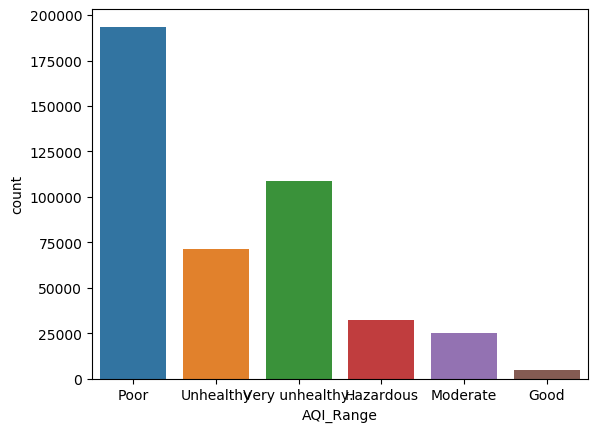

In [20]:
sns.countplot('AQI_Range', data=dv)

In [21]:
X=dv[['SOi','Noi','Rpi','SPMi']]
Y=dv['AQI']
X.head()

SOi     Noi         Rpi        SPMi
0  6.000  21.750  149.574767  134.263638
1  3.875   8.750  149.574767  134.263638
2  7.750  35.625  149.574767  134.263638
3  7.875  18.375  149.574767  134.263638
4  5.875   9.375  149.574767  134.263638

In [22]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (348593, 4)
The dimension of X_test is (87149, 4)


In [23]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred1=model1.predict(X_test)
y_pred1

array([200.67059987, 319.07091151, 121.58772607, ..., 225.85212248,
       220.95370808, 359.7693896 ])

In [25]:
r2score=r2_score(Y_test,y_pred1)
RMSE=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred1)))

print('RSquared error value for Linear Regression Model:',r2score)
print('RMS error value for Linear Regression Model:',RMSE)

RSquared error value for Linear Regression Model: 0.9258879934982615
RMS error value for Linear Regression Model: 29.71758940506008


Text(0.5, 1.0, 'Linear Regression model performance')

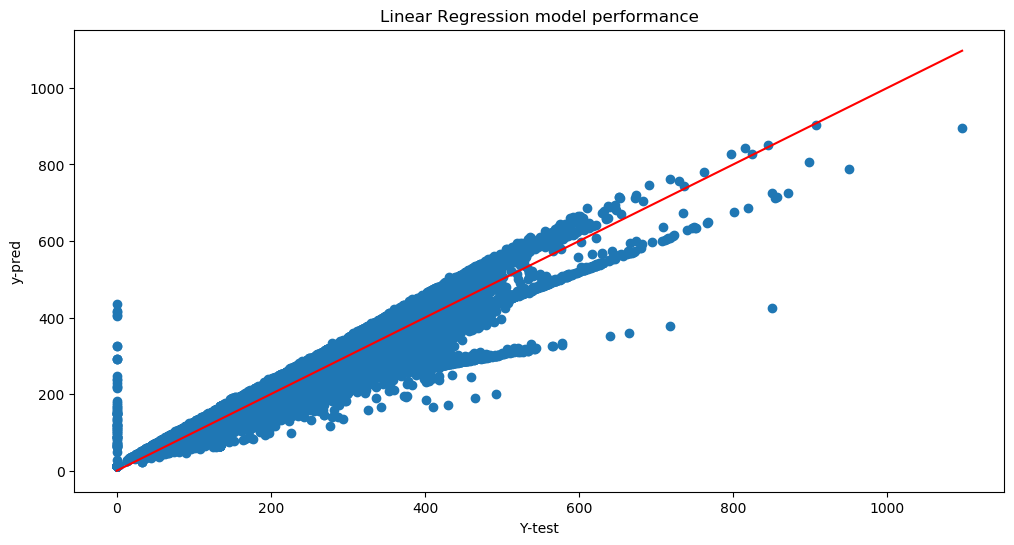

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred1)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.xlabel("Y-test")
plt.ylabel("y-pred")
plt.title("Linear Regression model performance")

In [27]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
y_pred2=model2.predict(X_test)
y_pred2

array([183.33333333, 336.15384615, 134.26363732, ..., 206.66666667,
       203.33333333, 325.38461538])

In [29]:
r2score2=r2_score(Y_test,y_pred2)
RMSE2=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))

print('RSquared error value for Random Forest Regressor model :',r2score2)
print('RMS error value for Random Forest Regressor model :',RMSE2)

RSquared error value for Random Forest Regressor model : 0.9993294238908291
RMS error value for Random Forest Regressor model : 2.8267885955681353


Text(0.5, 1.0, 'Random Forest Regression model performance')

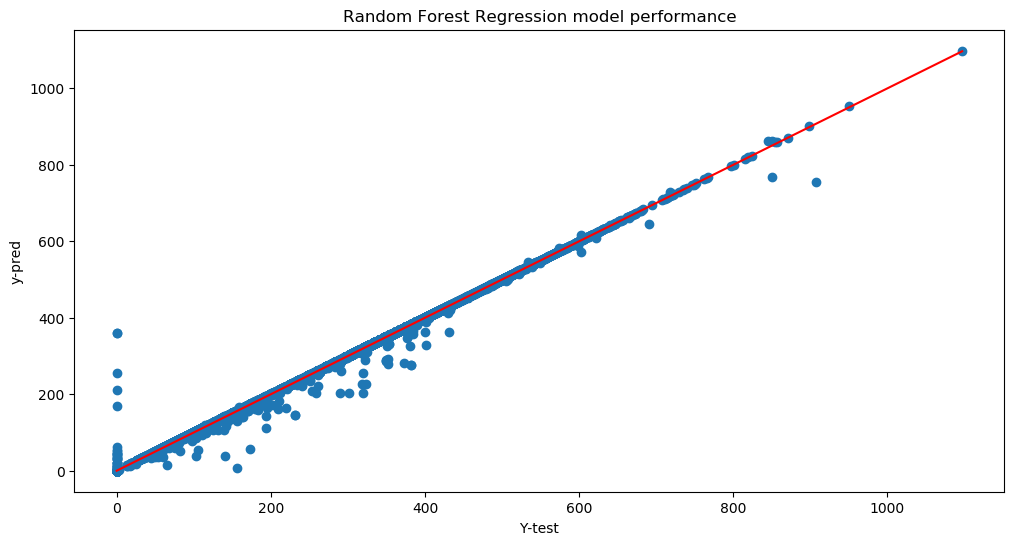

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred2)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.xlabel("Y-test")
plt.ylabel("y-pred")
plt.title("Random Forest Regression model performance")

In [31]:
model3=DecisionTreeRegressor()
model3.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
y_pred3=model3.predict(X_test)
y_pred3

array([183.33333333, 336.15384615, 134.26363887, ..., 206.66666667,
       203.33333333, 325.38461538])

In [33]:
r2score3=r2_score(Y_test,y_pred3)
RMSE3=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)))

print('RSquared error value for Decision Tree Regressor model :',r2score3)
print('RMS error value for Decision Tree Regressor model :',RMSE3)

RSquared error value for Decision Tree Regressor model : 0.9985491615065093
RMS error value for Decision Tree Regressor model : 4.157945830539847


Text(0.5, 1.0, 'Decession Tree Regression model performance')

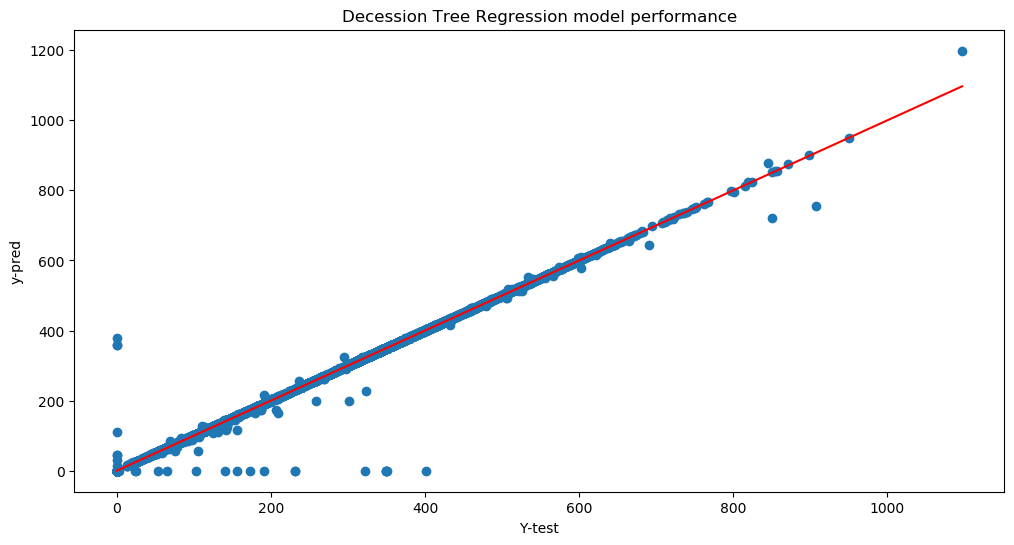

In [34]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred3)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.xlabel("Y-test")
plt.ylabel("y-pred")
plt.title("Decession Tree Regression model performance")

In [35]:
dv.head(50)

state   location                                type   so2   no2  \
0   Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.8  17.4   
1   Andhra Pradesh  Hyderabad                     Industrial Area   3.1   7.0   
2   Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.2  28.5   
3   Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.3  14.7   
4   Andhra Pradesh  Hyderabad                     Industrial Area   4.7   7.5   
5   Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.4  25.7   
6   Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   5.4  17.1   
7   Andhra Pradesh  Hyderabad                     Industrial Area   4.7   8.7   
8   Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.2  23.0   
9   Andhra Pradesh  Hyderabad                     Industrial Area   4.0   8.9   
10  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   3.6  18.6   
11  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   3.9  14.1   
12  Andhra Pradesh  Hyderabad                     Industrial Area   5.6  11.8   
13  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   3.3  19.3   
14  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   3.9   8.2   
15  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   3.5  12.1   
16  Andhra Pradesh  Hyderabad                     Industrial Area   7.9  10.2   
17  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.0   9.9   
18  Andhra Pradesh  Hyderabad                     Industrial Area  12.4  11.5   
19  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.0  12.3   
20  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.3  11.5   
21  Andhra Pradesh  Hyderabad                     Industrial Area  44.8  13.7   
22  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   8.1  17.8   
23  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   7.7  11.3   
24  Andhra Pradesh  Hyderabad                     Industrial Area  20.6  13.6   
25  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  20.4  27.5   
26  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  13.9   7.2   
27  Andhra Pradesh  Hyderabad                     Industrial Area  11.2  18.6   
28  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  22.3  35.9   
29  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  24.5  28.0   
30  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   7.2  10.4   
31  Andhra Pradesh  Hyderabad                     Industrial Area  28.7  16.2   
32  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  18.7  42.2   
33  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  24.5  18.0   
34  Andhra Pradesh  Hyderabad                     Industrial Area  20.4  12.6   
35  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   5.2  41.3   
36  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   7.5  12.2   
37  Andhra Pradesh  Hyderabad                     Industrial Area   4.8   8.4   
38  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   8.5  48.5   
39  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   9.7  12.4   
40  Andhra Pradesh  Hyderabad                     Industrial Area  21.2  11.5   
41  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.9  15.3   
42  Andhra Pradesh  Hyderabad                     Industrial Area  17.7  14.0   
43  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  12.3  38.6   
44  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   3.5  11.9   
45  Andhra Pradesh  Hyderabad                     Industrial Area   3.1   7.5   
46  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   3.0  19.0   
47  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.2  10.0   
48  Andhra Pradesh  Hyderabad               

In [36]:
SOI=float(input("Enter SOI value= "))
NOI=float(input("Enter NOI value= "))
RPI=float(input("Enter RPI value= "))
SPMI=float(input("Enter SPMI value= "))

new_array=np.array([[SOI,NOI,RPI,SPMI]])
p=model2.predict(new_array)

print("\nprediction\n")
if p<=50:
    AQI="Air Quality is Good"  
elif p>50 and p<=100 :
    AQI="Air Quality is Satisfactory"  
elif p>100 and p<=200:
    AQI="Air Quality is Moderate"  
elif p>200 and p<=300:
    AQI="Air Quality is Poor"  
elif p>300 and p<=400:
    AQI="Air Quality is Very Poor."  
elif p>400:
    AQI="Air Quality is Severe" 

print("AQI = ",p)
print(AQI)

Enter SOI value= 34
Enter NOI value= 123
Enter RPI value= 234
Enter SPMI value= 12

prediction

AQI =  [234.174]
Air Quality is Poor


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
X2 = dv[['SOi','Noi','Rpi','SPMi']]
Y2 = dv['AQI_Range']

In [42]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=0)

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train2,Y_train2)
#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

AttributeError: 'str' object has no attribute 'decode'